<a href="https://colab.research.google.com/github/Hero0963/data_science/blob/main/data_science_ch10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# exercise_01

# read penguin data
from google.colab import drive
drive.mount('/content/MyGoogleDrive')
import pandas as pd
df=pd.read_csv('/content/MyGoogleDrive/My Drive/Colab Notebooks/Python-for-Titanic/Ch10/penguin.csv')
df.info()

Drive already mounted at /content/MyGoogleDrive; to attempt to forcibly remount, call drive.mount("/content/MyGoogleDrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                338 non-null    int64  
 1   Length_cm         315 non-null    float64
 2   Weight_g          329 non-null    float64
 3   Species           338 non-null    object 
 4   Scientific Name   338 non-null    object 
 5   Inspector         338 non-null    object 
 6   Measurement Date  338 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 18.6+ KB


In [ ]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 337
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                332 non-null    int64  
 1   Length_cm         309 non-null    float64
 2   Weight_g          323 non-null    float64
 3   Species           332 non-null    object 
 4   Scientific Name   332 non-null    object 
 5   Inspector         332 non-null    object 
 6   Measurement Date  332 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 20.8+ KB


In [ ]:
df=df.reset_index(drop=True)
df

,ID,Length_cm,Weight_g,Species,Scientific Name,Inspector,Measurement Date
0,1,45.0,2847.0,Galapagos penguin,Spheniscus mendiculus,Janet,1990/9/19
1,2,53.0,3625.0,Chinstrap penguin,Pygoscelis antarcticus,Elbert,1991/6/21
2,3,83.0,3600.0,Chinstrap penguin,Pygoscelis antarcticus,Janet,1991/3/17
3,4,72.0,3282.0,Chinstrap penguin,Pygoscelis antarcticus,Antisthenes,1991/3/25
4,5,NaN,5630.0,Gentoo penguin,Pygoscelis papua,Alisha,1990/9/21
...,...,...,...,...,...,...,...
327,334,64.0,3752.0,Chinstrap penguin,Pygoscelis antarcticus,Charpentier,1991/3/8
328,335,45.0,2300.0,Galapagos penguin,Spheniscus mendiculus,Antisthenes,1991/3/11
329,336,53.0,897.0,Little penguin,Eudyptula minor,Janet,1990/9/17
330,337,37.0,812.0,Little penguin,Eudyptula minor,Antisthenes,1990/9/22


In [ ]:
species_list=df['Species'].unique().tolist()

for species in species_list:
    filter=df['Species']==species
    m_l=(df[filter]['Length_cm'].mean())
    m_w=(df[filter]['Weight_g'].mean())
    df.loc[filter,'Length_cm']=df.loc[filter,'Length_cm'].fillna(m_l)
    df.loc[filter,'Weight_g']=df.loc[filter,'Weight_g'].fillna(m_w)
  

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                332 non-null    int64  
 1   Length_cm         332 non-null    float64
 2   Weight_g          332 non-null    float64
 3   Species           332 non-null    object 
 4   Scientific Name   332 non-null    object 
 5   Inspector         332 non-null    object 
 6   Measurement Date  332 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 18.3+ KB


,ID,Length_cm,Weight_g,Species,Scientific Name,Inspector,Measurement Date
0,1,45.000000,2847.0,Galapagos penguin,Spheniscus mendiculus,Janet,1990/9/19
1,2,53.000000,3625.0,Chinstrap penguin,Pygoscelis antarcticus,Elbert,1991/6/21
2,3,83.000000,3600.0,Chinstrap penguin,Pygoscelis antarcticus,Janet,1991/3/17
3,4,72.000000,3282.0,Chinstrap penguin,Pygoscelis antarcticus,Antisthenes,1991/3/25
4,5,87.090909,5630.0,Gentoo penguin,Pygoscelis papua,Alisha,1990/9/21
...,...,...,...,...,...,...,...
327,334,64.000000,3752.0,Chinstrap penguin,Pygoscelis antarcticus,Charpentier,1991/3/8
328,335,45.000000,2300.0,Galapagos penguin,Spheniscus mendiculus,Antisthenes,1991/3/11
329,336,53.000000,897.0,Little penguin,Eudyptula minor,Janet,1990/9/17
330,337,37.000000,812.0,Little penguin,Eudyptula minor,Antisthenes,1990/9/22


In [ ]:
s={'Chinstrap penguin':0,'Little penguin':1,'Galapagos penguin':2,'Gentoo penguin':3,}
df['Species']=df['Species'].map(s)
df=df.astype({'Species': 'int'})
df

,ID,Length_cm,Weight_g,Species,Scientific Name,Inspector,Measurement Date
0,1,45.000000,2847.0,2,Spheniscus mendiculus,Janet,1990/9/19
1,2,53.000000,3625.0,0,Pygoscelis antarcticus,Elbert,1991/6/21
2,3,83.000000,3600.0,0,Pygoscelis antarcticus,Janet,1991/3/17
3,4,72.000000,3282.0,0,Pygoscelis antarcticus,Antisthenes,1991/3/25
4,5,87.090909,5630.0,3,Pygoscelis papua,Alisha,1990/9/21
...,...,...,...,...,...,...,...
327,334,64.000000,3752.0,0,Pygoscelis antarcticus,Charpentier,1991/3/8
328,335,45.000000,2300.0,2,Spheniscus mendiculus,Antisthenes,1991/3/11
329,336,53.000000,897.0,1,Eudyptula minor,Janet,1990/9/17
330,337,37.000000,812.0,1,Eudyptula minor,Antisthenes,1990/9/22


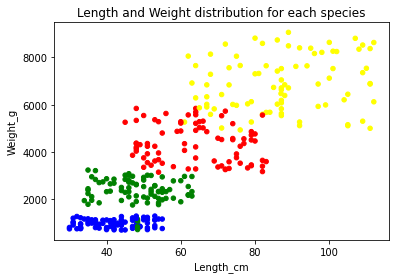

In [ ]:
# plot Length_cm-Weight_g -> Species scatter graph
# color list = https://datascientyst.com/full-list-named-colors-pandas-python-matplotlib/

c={ 0:'red', 1:'blue',2:'green',3:'yellow',}
df['colors']=df['Species'].map(c)

df.plot(kind='scatter',x='Length_cm',y='Weight_g',c=df['colors'], title= 'Length and Weight distribution for each species')

In [ ]:
# training model 
from sklearn.cluster import KMeans
df_X = df[['Length_cm','Weight_g']]


# pick suitable k
s = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km.fit(df_X)
    s.append(km.inertia_)
print(s)

[1830394465.230484, 446918526.76443934, 231158977.69087416, 102188989.30211155, 63567667.98263845, 42423014.948927864, 28810518.369323254, 21348648.425988585, 16394399.358178968, 12666955.685095446, 10755847.639900234, 9335951.883011362, 7888998.186775595, 6714670.996855423]


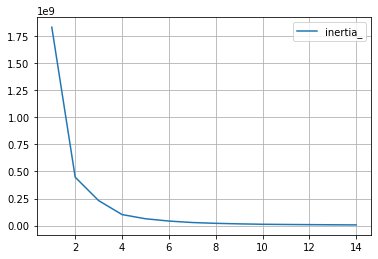

In [ ]:
# 看視覺化圖表決定參數K值
df_kmeans = pd.DataFrame()
df_kmeans['inertia_'] = s
df_kmeans.index = list(range(1,15))   
df_kmeans.plot(grid=True)

In [ ]:
k=4                     
km=KMeans(n_clusters=k)  
km.fit(df_X)

KMeans(n_clusters=4)

In [ ]:
print('分群的預測結果：')
pred = km.fit_predict(df_X) 
pred 

分群的預測結果：


array([2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3, 3, 0, 3, 2, 3, 1, 2, 3,
       3, 1, 1, 2, 1, 3, 1, 3, 0, 2, 3, 1, 2, 0, 2, 2, 3, 2, 2, 3, 2, 2,
       0, 3, 1, 0, 1, 3, 2, 2, 3, 3, 2, 3, 3, 3, 0, 2, 1, 3, 1, 3, 1, 2,
       1, 1, 3, 0, 1, 2, 0, 2, 2, 2, 1, 1, 3, 2, 1, 3, 2, 3, 2, 2, 2, 2,
       0, 2, 1, 3, 1, 1, 1, 3, 2, 2, 2, 2, 3, 3, 3, 1, 0, 0, 0, 2, 3, 2,
       2, 3, 0, 0, 2, 3, 2, 2, 3, 3, 0, 2, 2, 1, 1, 3, 1, 1, 3, 1, 3, 2,
       3, 3, 0, 3, 2, 3, 2, 2, 1, 2, 3, 2, 1, 1, 0, 2, 3, 1, 3, 2, 3, 3,
       2, 0, 2, 3, 2, 3, 3, 2, 1, 0, 1, 0, 1, 0, 1, 2, 3, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 3, 3, 3, 0, 2, 1, 2, 2, 0, 2, 0, 3,
       1, 3, 2, 3, 0, 2, 1, 2, 1, 2, 2, 1, 3, 1, 1, 2, 3, 1, 1, 3, 2, 3,
       1, 0, 1, 2, 3, 1, 0, 1, 1, 2, 3, 2, 1, 1, 1, 2, 0, 1, 3, 2, 0, 1,
       2, 1, 0, 1, 3, 0, 1, 2, 3, 1, 3, 1, 2, 3, 2, 2, 1, 2, 2, 2, 1, 2,
       0, 2, 1, 3, 1, 0, 0, 1, 0, 3, 3, 1, 1, 3, 2, 3, 1, 1, 0, 3, 3, 3,
       2, 1, 2, 1, 1, 0, 2, 1, 3, 1, 1, 1, 3, 1, 1,

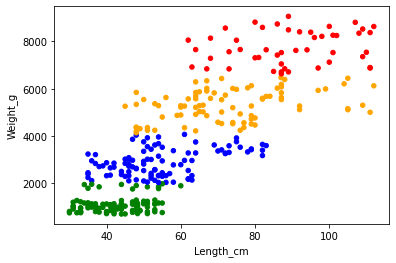

In [ ]:
df1 = df_X.copy()
df1['pred'] = pred
c = {0:'r', 1:'g', 2:'b',3:'orange'}
df1['colors'] = df1['pred'].map(c)
df1.plot(kind='scatter', x='Length_cm',y='Weight_g',c=df1['colors'])

In [ ]:
new = [[52,1234]]
v=km.predict(new)
print('預測結果為上塗顏色代號：', c[int(v)])

預測結果為上塗顏色代號： g


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
df.to_csv('/content/MyGoogleDrive/My Drive/Colab Notebooks/Python_Data_Science/penguin10.csv',index=False)

In [78]:
# read ShoeSize data
from google.colab import drive
drive.mount('/content/MyGoogleDrive')
import pandas as pd
df=pd.read_csv('/content/MyGoogleDrive/My Drive/Colab Notebooks/Python-for-Titanic/Ch10/ShoeSize.csv')
df.info()

Drive already mounted at /content/MyGoogleDrive; to attempt to forcibly remount, call drive.mount("/content/MyGoogleDrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10009 non-null  int64  
 1   Gender        10009 non-null  object 
 2   Height_cm     10004 non-null  float64
 3   Weight_kg     9999 non-null   float64
 4   Shoe size_cm  9994 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 391.1+ KB


In [79]:
# shoesize data cleaning
df=df.drop_duplicates()
df=df.reset_index(drop=True)
gender_list=df['Gender'].unique().tolist()

for gender in gender_list:
    filter=df['Gender']==gender
    m_l=(df[filter]['Height_cm'].mean())
    m_w=(df[filter]['Weight_kg'].mean())
    df.loc[filter,'Height_cm']=df.loc[filter,'Height_cm'].fillna(m_l)
    df.loc[filter,'Weight_kg']=df.loc[filter,'Weight_kg'].fillna(m_w)
  
df=df.dropna(axis='rows',how='any')
df=df.reset_index(drop=True)
df=df.astype({'Shoe size_cm': 'int'})
s={'Female':0,'Male':1}
df['Gender']=df['Gender'].map(s)
df['BMI']= df['Weight_kg'] / ((df['Height_cm']/100.0)**2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9985 entries, 0 to 9984
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            9985 non-null   int64  
 1   Gender        9985 non-null   int64  
 2   Height_cm     9985 non-null   float64
 3   Weight_kg     9985 non-null   float64
 4   Shoe size_cm  9985 non-null   int64  
 5   BMI           9985 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 468.2 KB


13


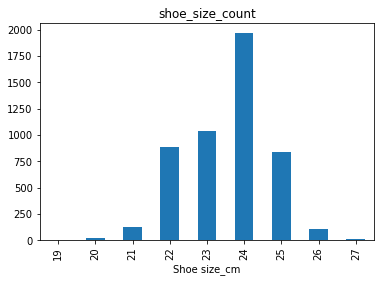

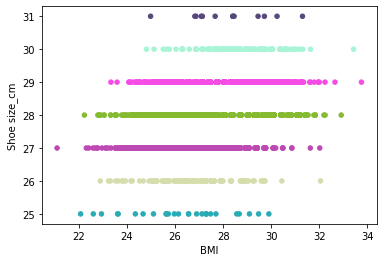

In [80]:
filter_female=df['Gender']==0
ax=df[filter_female].groupby(['Shoe size_cm'])['ID'].count().plot(kind='bar',title='shoe_size_count')

from random import randint
shoe_size_list=df['Shoe size_cm'].unique().tolist()
# print(shoe_size_list)
# print(type(shoe_size_list))
n=len(shoe_size_list)
colors_list=[]
for i in range(n):
  colors_list.append('#%06X' % randint(0, 0xFFFFFF))
                                    
# colors_list
color_converter = dict(zip(shoe_size_list, colors_list))
print(len(color_converter))

df['shoe_size_colors']=df['Shoe size_cm'].map(color_converter)

df[filter_male].plot(kind='scatter',x='BMI',y='Shoe size_cm',c=df[filter_male]['shoe_size_colors'])

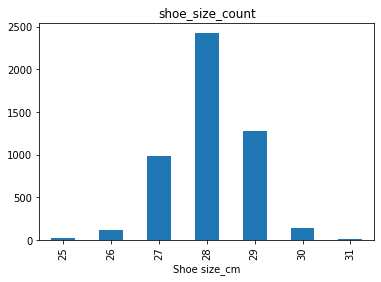

In [81]:
filter_male=df['Gender']==1
df[filter_male].groupby(['Shoe size_cm'])['ID'].count().plot(kind='bar',title='shoe_size_count')

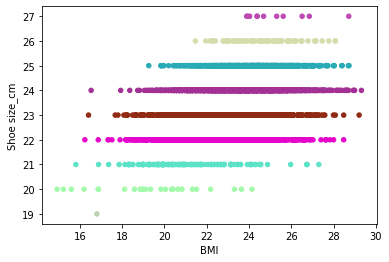

In [82]:
df[filter_female].plot(kind='scatter',x='BMI',y='Shoe size_cm',c=df[filter_female]['shoe_size_colors'])

In [83]:
# training model 
from sklearn.cluster import KMeans
df_X = df[['Gender','Height_cm','BMI']]


# pick suitable k
s = []
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km.fit(df_X)
    s.append(km.inertia_)
print(s)

[1021640.0013342442, 351329.8249737929, 200274.14475382335, 136659.3264985245, 105742.21385793692, 86932.66281381174, 75853.00667207973, 66458.73908231172, 59197.71179717865, 53733.114956828955, 49160.19031949337, 45513.320803619106, 42428.751481560175, 39454.06036540014, 36849.61316813047, 35076.633408650785, 33228.25591394951, 31914.52988474926, 30308.981860398806]


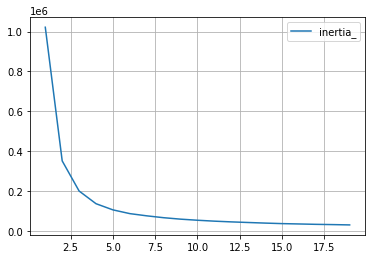

In [84]:
# 看視覺化圖表決定參數K值
df_kmeans = pd.DataFrame()
df_kmeans['inertia_'] = s
df_kmeans.index = list(range(1,20))   
df_kmeans.plot(grid=True)

In [85]:
k=4                  
km=KMeans(n_clusters=k)  
km.fit(df_X)

KMeans(n_clusters=4)

In [86]:
print('分群的預測結果：')
pred = km.fit_predict(df_X) 
pred 

分群的預測結果：


array([0, 3, 0, ..., 2, 2, 1], dtype=int32)

In [87]:
new = [[1,176,24.85]]
v=km.predict(new)
print(v)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [88]:
df.to_csv('/content/MyGoogleDrive/My Drive/Colab Notebooks/Python_Data_Science/shoesize10.csv',index=False)